# Estimacion de produccion de Aceite y Gas

- PENDIENTES:

    Estimar ecuacion, en forma de funcion

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import pandas_profiling

font = {'family' : 'sans',
        'weight' : 'bold',
        'size'   : 20}
plt.rc('font', **font)
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams[u'figure.figsize'] = (16,12)
params = {'legend.fontsize': 'x-large',
         'axes.labelsize': 'x-large',
         }
# plt.style.use('seaborn-poster')
plt.style.use('ggplot')

import sys
sys.path.append('../serch_tools/')
import serch_tools as st


In [2]:
aforos = pd.read_csv("aforos.csv")
analisis_fluidos = pd.read_csv("Analisis_fluidos.csv")
columna_geologica = pd.read_csv('columna_geologica.csv')
datos_generales_pozos = pd.read_csv('datos_generales_de_pozos.csv')
eval_petrofisica = pd.read_csv('eval_petrofisica.csv')
intervalo_disparado = pd.read_csv('IntervalosDisparados.csv')
parametros_petrofisicos = pd.read_csv('parametros_petrofisicos.csv')

In [3]:
reserva = pd.read_csv('reservas_2014.csv',nrows=3) # solo tiene 3 registros y muchos nulos

In [4]:
reserva

,index,REGION,ACTIVO,CAMPO,YACIMIENTO,CATEGORIA,FECHA_DE_CERTIFICACION_(dd/mm/aaaa),VOLUMEN_ORIGINAL_ACEITE_(mmb),VOLUMEN_ORIGINAL_GAS_NATURAL_(mmmpc),VOLUMEN_ORIGINAL_CONDENSADO_(mmb),...,FACTOR_DE_VOLUMEN_DEL_ACEITE@PRESION_INICIAL _(bls@cy/bls@cs),RELACION_CONDENSADO_GAS_(mb/mmpc),FACTOR_DE_VOLUMEN_DEL_GAS@PRESION_INICIAL_(pc@cy/pc@cs),RELACION_INICIAL_GAS_DISUELTO/ACEITE_ORIGINAL_ (mmpc/mb),FACTOR_DE_ENCOGIMIENTO_POR_LICUABLES_EN_EL_TRANSPORTE,FACTOR_DE_ENCOGIMIENTO_POR_IMPUREZAS,FACTOR_DE_ENCOGIMIENTO_LICUABLES_EN_PLANTA,FACTOR_DE_RECUPERACION _DE_CONDENSADO_(b/mpc),FACTOR_DE_RECUPERACION_DE_LIQUIDO_EN_PLANTA_(b/mpc),FACTOR_DE_EQUIVALENCIA_DEL_GAS_A_LIQUIDO_(b/mpc)
0,0,SPRS,APCP,Moloacán,Mioceno,1P,41640,221.70173,121.935952,0.0,...,1.127,NaN,NaN,0.549989,1,1,0.834292,0,0.106724,0.192273
1,1,SPRS,APCP,Moloacán,Mioceno,2P,41640,221.70173,121.935952,NaN,...,1.127,0.0,0.0,0.549989,1,1,0.834292,0,0.106724,0.192273
2,2,SPRS,APCP,Moloacán,Mioceno,3P,41640,221.70173,121.935952,0.0,...,1.127,NaN,0.0,0.549989,1,1,0.834292,0,0.106724,0.192273


In [5]:
prod_mens = pd.read_csv('produccion_mensual.csv')
prod_mens.head()

,index,NOMBRE_DEL_POZO,CIMA_INTERVALO_(md),BASE_INTERVALO_(md),CONDICION_DE_FLUJO_(Fluyente/SAP),FECHA_DE_LA_PRODUCCION_(dd/mm/aaaa),RELACION_GAS_LIQUIDO_(m3/m3),RELACION_GAS_ACEITE_(m3/m3),CORTE_DE_AGUA_(bl/bl),SALINIDAD_(PPM),...,RELACION_CONDENSADO_GAS_(m3/m3),RELACION_AGUA_GAS_(m3/m3),RELACION_AGUA_CONDENSADO_(m3/m3),FRACCION_DEL_SEDIMENTO,DIAMETRO_DEL_ESTRANGULADOR _(in),VOLUMEN_DE_ACEITE_(m3),VOLUMEN_DE_GAS_(m3),VOLUMEN_DE_CONDENSADO_(m3),DIAS_DE_PRODUCCION,DESCRIPCION_DE_LA_PRODUCCION
0,0,MOLOACAN-102A,SIN INFORMACION,SIN INFORMACION,SAP,01/10/2013,101.175571,203.152074,50.205197,SIN INFORMACION,...,NO APLICA,0.004962,NO APLICA,NO APLICA,NO APLICA,31.803914,6462.078342,NO APLICA,31,SIN INFORMACION
1,1,MOLOACAN-102A,SIN INFORMACION,SIN INFORMACION,SAP,01/11/2013,100.298703,203.279313,50.667656,SIN INFORMACION,...,NO APLICA,0.005052,NO APLICA,NO APLICA,NO APLICA,29.536942,6005.222347,NO APLICA,30,SIN INFORMACION
2,2,MOLOACAN-102A,SIN INFORMACION,SIN INFORMACION,SAP,01/12/2013,101.159166,203.859067,50.385933,SIN INFORMACION,...,NO APLICA,0.004981,NO APLICA,NO APLICA,NO APLICA,30.852725,6290.627114,NO APLICA,31,SIN INFORMACION
3,3,MOLOACAN-102A,SIN INFORMACION,SIN INFORMACION,SAP,01/01/2014,101.316590,203.424976,50.202687,SIN INFORMACION,...,NO APLICA,0.004955,NO APLICA,NO APLICA,NO APLICA,31.774044,6464.681785,NO APLICA,31,SIN INFORMACION
4,4,MOLOACAN-102A,SIN INFORMACION,SIN INFORMACION,SAP,01/02/2014,101.316590,203.424976,50.202687,SIN INFORMACION,...,NO APLICA,0.004955,NO APLICA,NO APLICA,NO APLICA,28.699137,5839.067419,NO APLICA,28,SIN INFORMACION


In [6]:
prod_mens.columns

Index(['index', 'NOMBRE_DEL_POZO', 'CIMA_INTERVALO_(md)',
       'BASE_INTERVALO_(md)', 'CONDICION_DE_FLUJO_(Fluyente/SAP)',
       'FECHA_DE_LA_PRODUCCION_(dd/mm/aaaa)', 'RELACION_GAS_LIQUIDO_(m3/m3)',
       'RELACION_GAS_ACEITE_(m3/m3)', 'CORTE_DE_AGUA_(bl/bl)',
       'SALINIDAD_(PPM)', 'RELACION_AGUA_ACEITE_(m3/m3)',
       'RELACION_CONDENSADO_GAS_(m3/m3)', 'RELACION_AGUA_GAS_(m3/m3)',
       'RELACION_AGUA_CONDENSADO_(m3/m3)', 'FRACCION_DEL_SEDIMENTO',
       'DIAMETRO_DEL_ESTRANGULADOR _(in)', 'VOLUMEN_DE_ACEITE_(m3)',
       'VOLUMEN_DE_GAS_(m3)', 'VOLUMEN_DE_CONDENSADO_(m3)',
       'DIAS_DE_PRODUCCION ', 'DESCRIPCION_DE_LA_PRODUCCION '],
      dtype='object')

In [7]:
prod_mens.groupby(['NOMBRE_DEL_POZO'])['FECHA_DE_LA_PRODUCCION_(dd/mm/aaaa)'].count().median()

121.0

In [8]:
prod_mens['fecha_produccion'] = pd.to_datetime(prod_mens['FECHA_DE_LA_PRODUCCION_(dd/mm/aaaa)'], 
                                               format="%d/%m/%Y")

In [9]:
prod_mens['fecha_produccion'].describe()

count                   20821
unique                    187
top       1999-01-01 00:00:00
freq                      156
first     1999-01-01 00:00:00
last      2014-07-01 00:00:00
Name: fecha_produccion, dtype: object

En algunos posos tenemos un historico de 1999 hasta 2014

Text(0, 0.5, 'Produccion promedio')

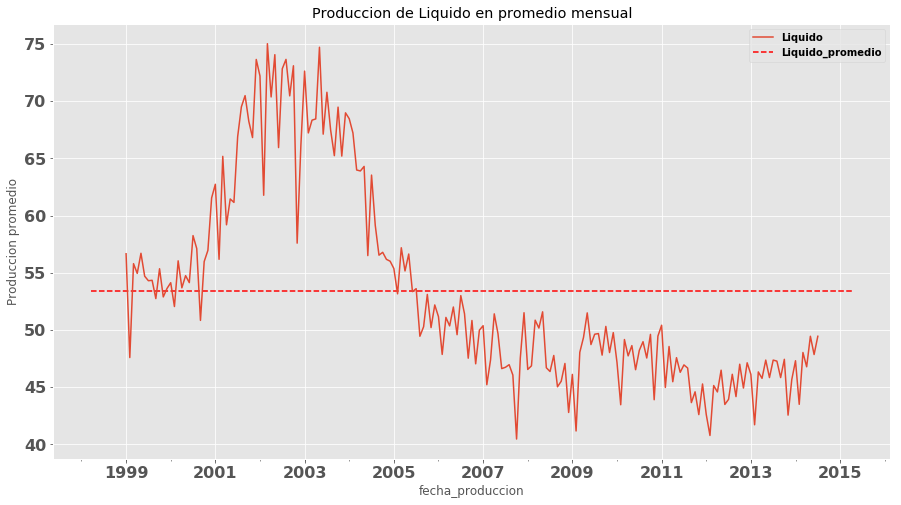

In [10]:
prod_mens.groupby('fecha_produccion').mean()['VOLUMEN_DE_ACEITE_(m3)'].plot(figsize=(15,8), 
                                                             title='Produccion de Liquido en promedio mensual')
mi,ma = plt.xlim()
plt.hlines(prod_mens.groupby('fecha_produccion').mean()['VOLUMEN_DE_ACEITE_(m3)'].mean(),
           mi, ma, color='r', linestyles='--')
plt.legend(['Liquido','Liquido_promedio'])
plt.ylabel('Produccion promedio')

Text(0, 0.5, 'Produccion promedio')

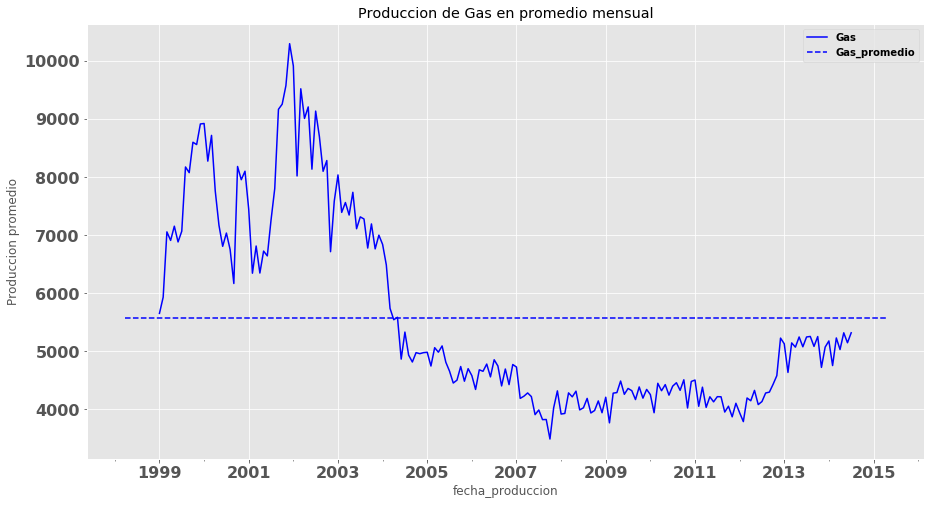

In [11]:
prod_mens.groupby('fecha_produccion').mean()['VOLUMEN_DE_GAS_(m3)'].plot(figsize=(15,8), 
                                                             title='Produccion de Gas en promedio mensual'
                                                            ,color='b')
mi,ma = plt.xlim()
plt.hlines(prod_mens.groupby('fecha_produccion').mean()['VOLUMEN_DE_GAS_(m3)'].mean(),
           mi, ma, color='b', linestyles='--')
plt.legend(['Gas','Gas_promedio'])
plt.ylabel('Produccion promedio')

120 Mediciones por plataforma en promedio tenemos

Text(0, 0.5, 'Produccion total en $10^3$')

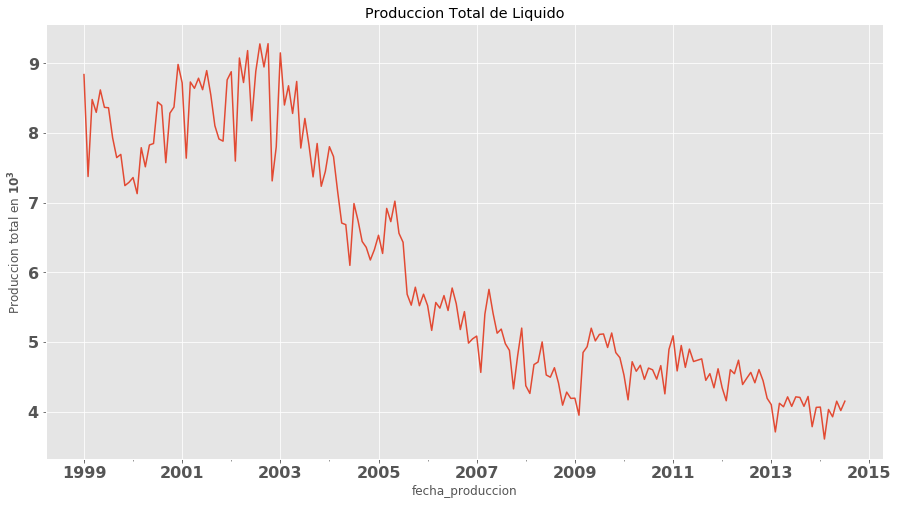

In [12]:
prod_total_liq = prod_mens.groupby('fecha_produccion')['VOLUMEN_DE_ACEITE_(m3)'].sum() / 1e3
prod_total_liq.plot(figsize=(15,8), title='Produccion Total de Liquido')
plt.ylabel('Produccion total en $10^3$')

Text(0, 0.5, 'Produccion total en $10^5$')

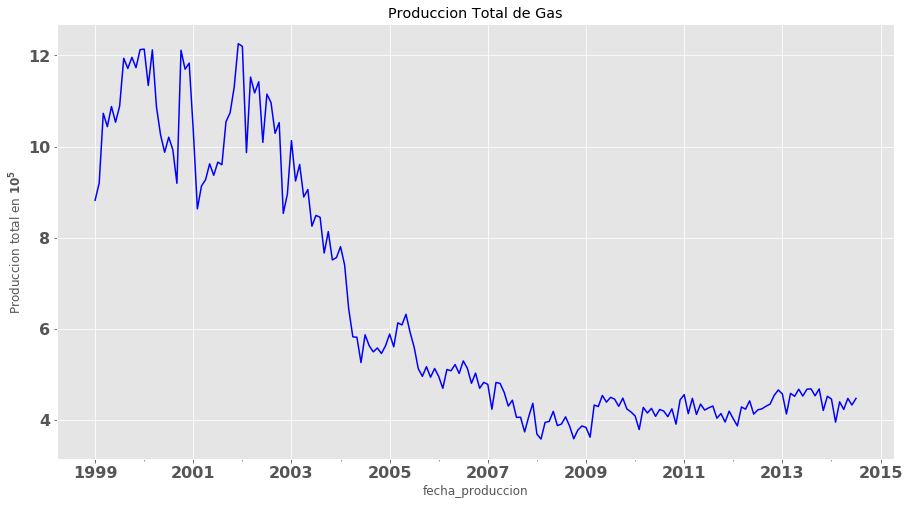

In [13]:
prod_total_liq = prod_mens.groupby('fecha_produccion')['VOLUMEN_DE_GAS_(m3)'].sum() / 1e5
prod_total_liq.plot(figsize=(15,8), title='Produccion Total de Gas', color='b')
plt.ylabel('Produccion total en $10^5$')

In [14]:
prod_mens.columns

Index(['index', 'NOMBRE_DEL_POZO', 'CIMA_INTERVALO_(md)',
       'BASE_INTERVALO_(md)', 'CONDICION_DE_FLUJO_(Fluyente/SAP)',
       'FECHA_DE_LA_PRODUCCION_(dd/mm/aaaa)', 'RELACION_GAS_LIQUIDO_(m3/m3)',
       'RELACION_GAS_ACEITE_(m3/m3)', 'CORTE_DE_AGUA_(bl/bl)',
       'SALINIDAD_(PPM)', 'RELACION_AGUA_ACEITE_(m3/m3)',
       'RELACION_CONDENSADO_GAS_(m3/m3)', 'RELACION_AGUA_GAS_(m3/m3)',
       'RELACION_AGUA_CONDENSADO_(m3/m3)', 'FRACCION_DEL_SEDIMENTO',
       'DIAMETRO_DEL_ESTRANGULADOR _(in)', 'VOLUMEN_DE_ACEITE_(m3)',
       'VOLUMEN_DE_GAS_(m3)', 'VOLUMEN_DE_CONDENSADO_(m3)',
       'DIAS_DE_PRODUCCION ', 'DESCRIPCION_DE_LA_PRODUCCION ',
       'fecha_produccion'],
      dtype='object')

# Tabla DB_produccion_Moloacan

Tabla con historico de produccion en unidades de barriles mensuales

    Fecha - Fecha de registro
    Pozo -  Nombre del pozo
    Dias - Numero de dias del mes en curso
    Qo_mes_b - Numero de Barriles de Oil mensuales
    Qo_prom_mesbd - Promedio de barriles diarios Qo_mes_b / Dias
    Qg_mes_MMpc - 
    Qg_prom_mes_MMpcd - Qg_mes_MMpc / Dias
    Qw_mes_b - Numero de barriles de agua mensual
    Qw_prom_mes_bd - Promedio de barriles mensuales de agua  Qw_mes_b / Dias
    Fw_% - Porcentaje de Agua
    RGA_m3/m3 - Relacion Gas Aceite
    Dias_de_Operacion - Dias que estuvo operando la plataforma

In [217]:
db_prod_mol = pd.read_csv('DB_prod_moloacan.csv')
db_prod_mol.columns = db_prod_mol.columns.str.replace(" ","_").str.replace(
    "(","").str.replace(")","").str.replace(".","").str.replace('á',"a").str.replace('é',"e").str.replace(
    'í',"i").str.replace('ó',"o").str.replace('ú',"u")
# transfromaciones
db_prod_mol['Qo_mes_b'] = db_prod_mol['Qo_mes_b'].str.replace(',', '').astype(float)
db_prod_mol['Qw_mes_b'] = db_prod_mol['Qw_mes_b'].str.replace(',', '').astype(float)
db_prod_mol['RGA_m3/m3'] = db_prod_mol['RGA_m3/m3'].str.replace(',', '').astype(float)
db_prod_mol["Pozo"] = db_prod_mol.Pozo.str.replace("Á","A")

In [218]:
db_prod_mol.columns

Index(['Fecha', 'Pozo', 'Dias', 'Qo_mes_b', 'Qo_prom_mesbd', 'Qg_mes_MMpc',
       'Qg_prom_mes_MMpcd', 'Qw_mes_b', 'Qw_prom_mes_bd', 'Fw_%', 'RGA_m3/m3',
       'Dias_de_Operacion'],
      dtype='object')

In [219]:
db_prod_mol['fecha_produccion'] = pd.to_datetime(db_prod_mol.Fecha, format="%d/%m/%Y")

In [220]:
db_prod_mol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20886 entries, 0 to 20885
Data columns (total 13 columns):
Fecha                20886 non-null object
Pozo                 20886 non-null object
Dias                 20886 non-null int64
Qo_mes_b             20886 non-null float64
Qo_prom_mesbd        20886 non-null float64
Qg_mes_MMpc          20886 non-null float64
Qg_prom_mes_MMpcd    20886 non-null float64
Qw_mes_b             20886 non-null float64
Qw_prom_mes_bd       20886 non-null float64
Fw_%                 20886 non-null float64
RGA_m3/m3            20886 non-null float64
Dias_de_Operacion    20886 non-null int64
fecha_produccion     20886 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(8), int64(2), object(2)
memory usage: 2.1+ MB


In [221]:
prod_mens.groupby('fecha_produccion').mean()['VOLUMEN_DE_ACEITE_(m3)'].head()

fecha_produccion
1999-01-01    56.658552
1999-02-01    47.592117
1999-03-01    55.794374
1999-04-01    54.945367
1999-05-01    56.702242
Name: VOLUMEN_DE_ACEITE_(m3), dtype: float64

In [222]:
db_prod_mol.groupby('fecha_produccion').mean()['Qo_mes_b'].head()

fecha_produccion
1999-01-01    356.382372
1999-02-01    299.353935
1999-03-01    350.946842
1999-04-01    345.607550
1999-05-01    356.656382
Name: Qo_mes_b, dtype: float64

Text(0, 0.5, 'Produccion promedio')

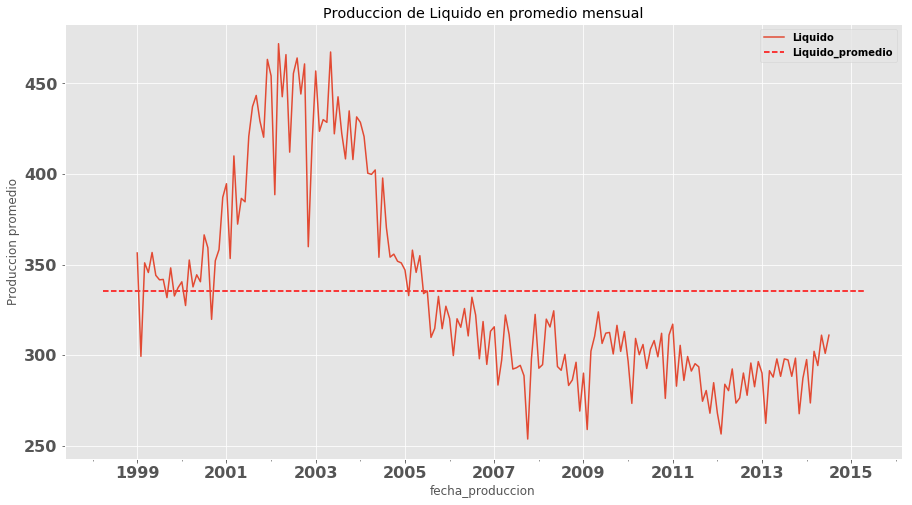

In [223]:
db_prod_mol.groupby('fecha_produccion').mean()['Qo_mes_b'].plot(figsize=(15,8), 
                                                             title='Produccion de Liquido en promedio mensual')
mi,ma = plt.xlim()
plt.hlines(db_prod_mol.groupby('fecha_produccion').mean()['Qo_mes_b'].mean(),
           mi, ma, color='r', linestyles='--')
plt.legend(['Liquido','Liquido_promedio'])
plt.ylabel('Produccion promedio')

Se producen por plataforma 330 barriles mensuales CHECAR!!

Text(0, 0.5, 'Produccion total')

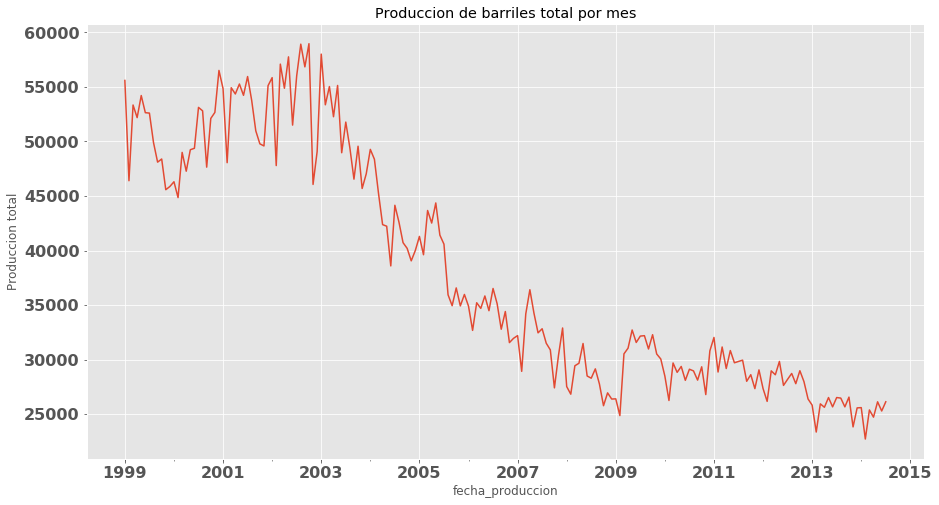

In [224]:
db_prod_mol.groupby('fecha_produccion').sum()['Qo_mes_b'].plot(figsize=(15,8), 
                                                             title='Produccion de barriles total por mes')

plt.ylabel('Produccion total')

444161.9031249999

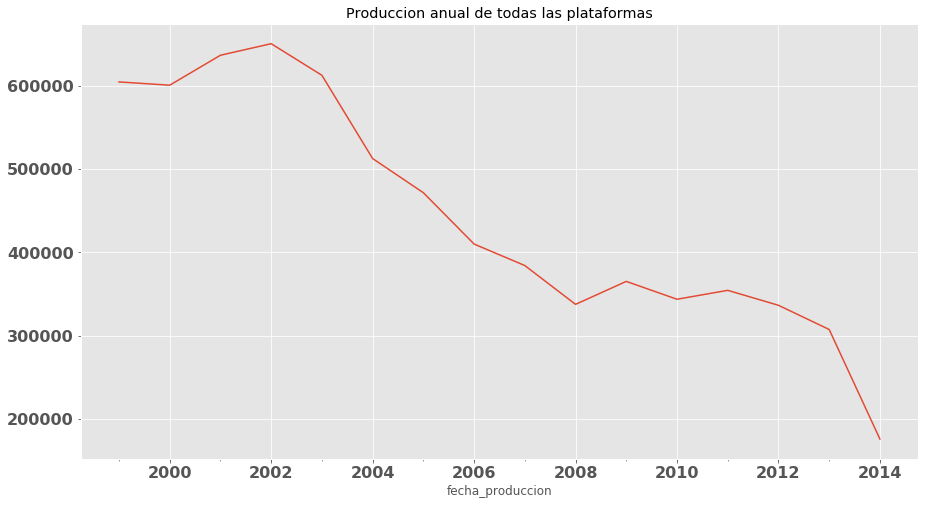

In [225]:
db_prod_mol.set_index('fecha_produccion').resample('Y').sum()['Qo_mes_b'].plot(figsize=(15,8), 
title='Produccion anual de todas las plataformas')
db_prod_mol.set_index('fecha_produccion').resample('Y').sum()['Qo_mes_b'].mean()

Anualmente se generan 444,000 barriles de petroleo CHECAR!!!

In [226]:
idx = db_prod_mol.Pozo.sample(3).values
sample = db_prod_mol[db_prod_mol.Pozo.isin(idx)]

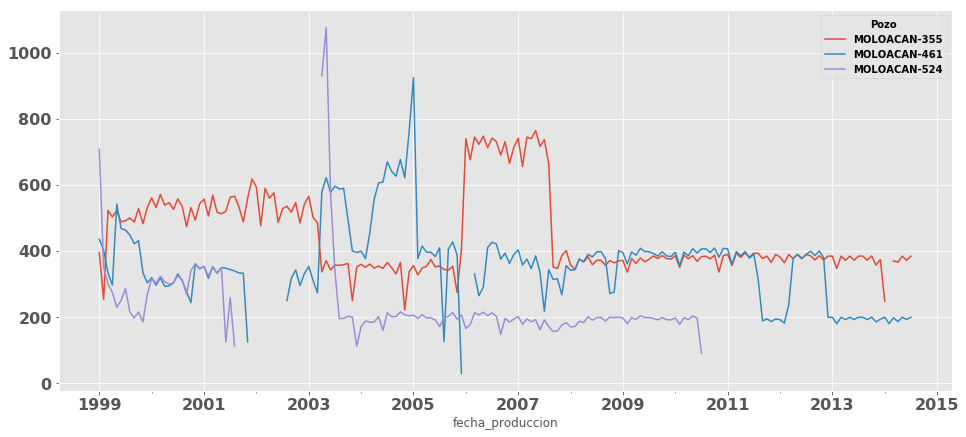

In [227]:
sample.groupby(['Pozo','fecha_produccion']).Qo_mes_b.sum().unstack(0).plot(figsize=(16,7))

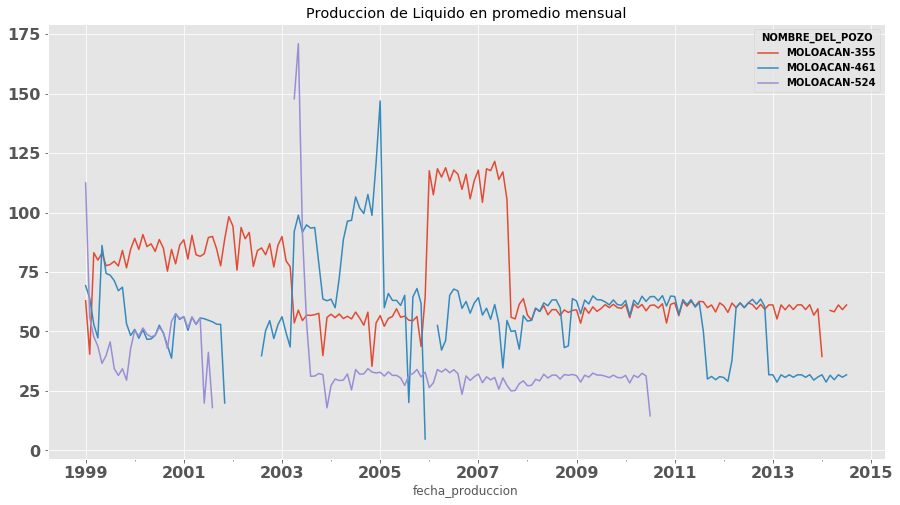

In [228]:
prod_mens[prod_mens.NOMBRE_DEL_POZO.isin(idx)].groupby(['NOMBRE_DEL_POZO','fecha_produccion'])[
    'VOLUMEN_DE_ACEITE_(m3)'].sum().unstack(0).plot(figsize=(15,8), 
    title='Produccion de Liquido en promedio mensual')

# Relacion entre barriles de petroleo y volumen de aceite

In [229]:
a = db_prod_mol[db_prod_mol.Pozo=='MOLOACAN-705'].groupby(['Pozo','fecha_produccion']).Qo_mes_b.sum()

In [230]:
b = prod_mens[prod_mens.NOMBRE_DEL_POZO=='MOLOACAN-705'].groupby(['NOMBRE_DEL_POZO','fecha_produccion'])[
    'VOLUMEN_DE_ACEITE_(m3)'].sum()

In [231]:
(a/b).mean()

6.289995674364903

In [232]:
(b/a).mean()

0.15898262132747365

# Numero de registros posibles para entrenamiento

In [233]:
print('Numero de plataformas: %i' % db_prod_mol.Pozo.nunique())

Numero de plataformas: 178


In [234]:
print('Numero de mediciones promedio por plataforma: %i' % db_prod_mol.groupby('Pozo').fecha_produccion.count().median())

Numero de mediciones promedio por plataforma: 124


In [235]:
a = 178 * 124

In [236]:
print('Alrededor de %i registros' % a)

Alrededor de 22072 registros


In [238]:
db_prod_mol.head()

,Fecha,Pozo,Dias,Qo_mes_b,Qo_prom_mesbd,Qg_mes_MMpc,Qg_prom_mes_MMpcd,Qw_mes_b,Qw_prom_mes_bd,Fw_%,RGA_m3/m3,Dias_de_Operacion,fecha_produccion
0,01/01/1999,MOLOACAN-102D,31,460.04,14.84,0.39,0.01,169.58,5.47,26.93,150.99,31,1999-01-01
1,01/01/1999,MOLOACAN-111,31,169.92,5.48,0.10,0.00,158.43,5.11,48.25,99.99,31,1999-01-01
2,01/01/1999,MOLOACAN-112,31,283.14,9.13,0.11,0.00,12.17,0.39,4.12,68.35,31,1999-01-01
3,01/01/1999,MOLOACAN-122,31,635.64,20.50,0.33,0.01,641.24,20.69,50.22,93.09,31,1999-01-01
4,01/01/1999,MOLOACAN-132,31,80.73,2.60,0.12,0.00,72.14,2.33,47.19,267.99,31,1999-01-01
